# Orbital Feshbach Resonance 的高温展开
#### 主要内容： 
1. 0306187重复计算
2. 173Yb原子的数据
3. Hong-Yang 赝势的计算的高温展开(Yb173)
4. 有效力程模型的高温展开(Yb173)
5. 把散射长度展开到二阶重复3
6. 把散射相位写成显式重复3(此时取一个上界)
7. 把3，5，6结合起来画个图、即把Huang-Yang赝势直接高温展开、二阶、显示画在同一个图里

#### 主要参考了0306187、以及程艳婷毕业论文

### 注意我在这里用了一个SciencePlot包，可以画论文格式的图，只需要加上下面代码即可

In [ ]:
plt.style.use('science')
plt.style.use(['science','ieee'])
''' 其他的还有
「science」
「science」+「grid」
「ieee」
「notebook」
「dark_background」+「science」+「 high-vis」
high-vis
bright
vibrant
muted
retro
'''

In [ ]:
'''对于一些期刊，比如IEEE，图表的格式要求中提出要在基本格式上
强调某些特定的参数（字体大小，图片宽度等），
单独调用这些特殊格式要求使用如下代码： '''
with plt.style.context(['science', 'ieee']):
    plt.figure()
    plt.plot(x, y)
    plt.show()

## 1. 0306187重复计算
这部分计算采用的是
$$a_s=a_{bg}(1-\frac{\Delta B}{B-B_{res}})$$
参数可以在代码框进行修改

No handles with labels found to put in legend.


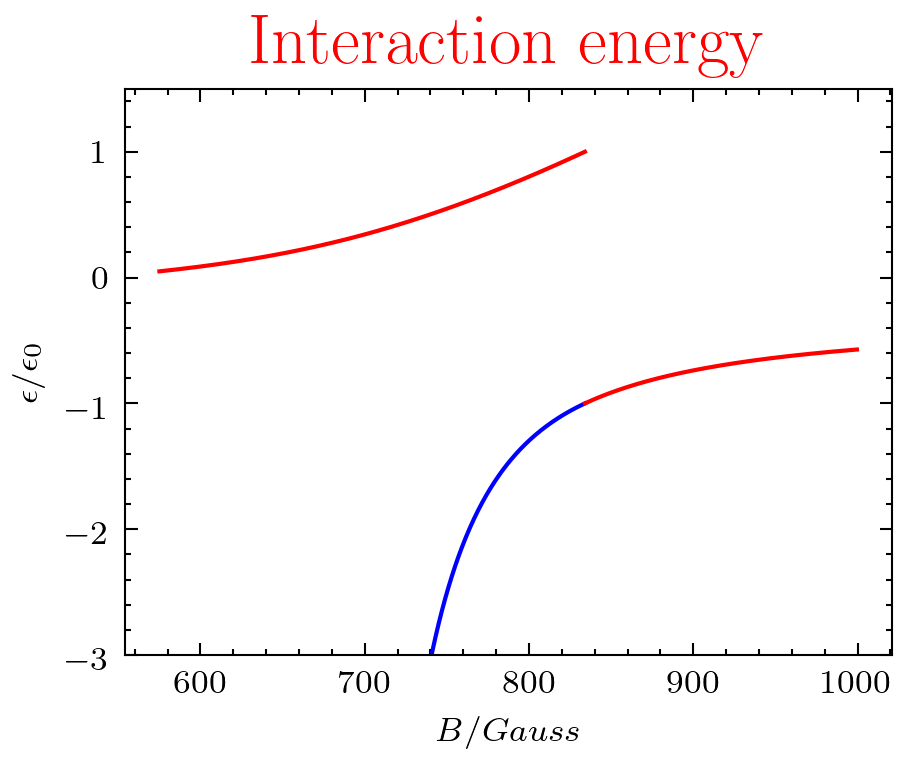

In [3]:
# -*- coding: utf-8 -*-

import numpy as np
import math
import matplotlib.pyplot as plt


#输入参数，其中T的单位是K，B0的单位是Gauss，DB的单位是Gauss，abg的单位是a0，m的单位是unit
T=1e-5
B0=834.1
DB=-300
abg=-1405
m=6


#计算单元 ((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))

x1=np.arange(575,834.1,0.5)
x2=np.arange(834.1,1000,0.5)

Nobound1=[ -4.9498*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))+(1+115.457*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*math.erfc(13.16*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB)))*math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2) for a in x1]

Nobound2=[ -4.9498*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))-(1+115.457*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*math.erfc(-13.16*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB)))*math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)  for a in x2]

Bound1=[ -4.9498*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))+(1+115.457*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*math.erfc(13.16*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB)))*math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)-math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*(346.3712*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2 + 2)    for a in x1] # y和x的函数关系（可以用math函数）

plt.style.use(['science','ieee'])
plt.figure(num=3,dpi=300)
plt.plot(x1,Nobound1,color='red',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound1,color='b',linewidth=1.0,linestyle='-')
plt.plot(x2,Nobound2,color='red',linewidth=1.0,linestyle='-')

ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-3,1.5)
#plot1=plt.plot(x,y1,'-r',label="log(T^2)-L")
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.legend(loc='lower right')
plt.show()


## 2. 173Yb原子的数据
#### 这部分数据来自程艳婷的毕业论文：
1. $a^{(+)}=1900a_0 $
2. $a^{(-)}=200a_0 $
3. $\delta\mu=2\pi\hbar\times112Hz/Gauss$
4. $r_0=84.8a_0$
5. $\beta_6=169.6a_0$（这个由于没用量子亏损理论，所以暂时没用到）

## 3. Hong-Yang 赝势的计算的高温展开(Yb173)
这部分采用的公式是Hong-Yang赝势的计算公式
$$a_s=-f_o(k=0)=\frac{-a_{s0}+\sqrt{\frac{m\delta}{\hbar^2}}(a_{s0}^2-a_{s1}^2)   }{a_{s0}\sqrt{\frac{m\delta}{\hbar^2}}-1}$$
参数可以在代码框进行修改

No handles with labels found to put in legend.


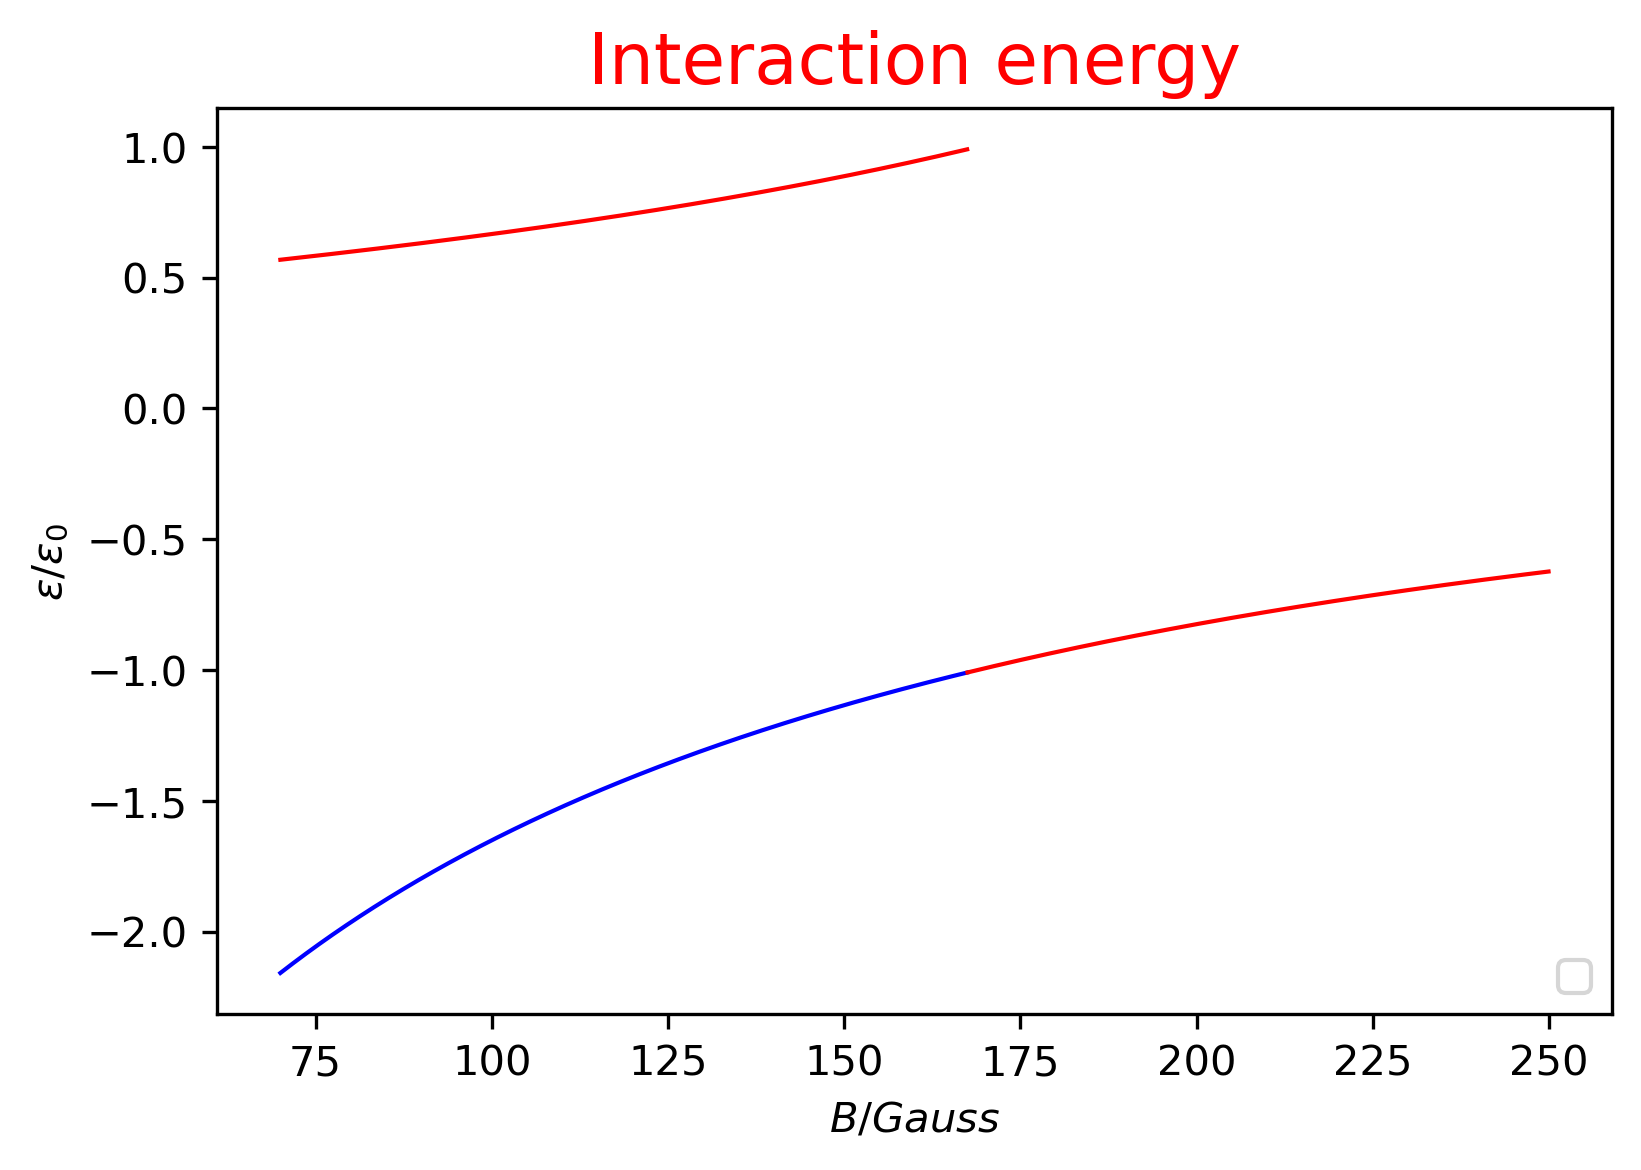

In [43]:
# -*- coding: utf-8 -*-

import numpy as np
import math
import matplotlib.pyplot as plt

#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04


#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2
#散射长度公式
#asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
#alpha=6.96482e-10/math.sqrt(m*T)/asc
#计算单元 ((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))

x1=np.arange(70,167.5,0.05)
x2=np.arange(167.5,250,0.05)

Nobound1=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
#还是先看看asc符合不    temp=asc
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=-0.376*alpha+(1+2/3*alpha**2)*math.erfc(alpha)*math.exp(alpha**2)
    Nobound1.append(temp)

Nobound2=[]
for B in x2:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
#还是先看看asc符合不    temp=asc
    alpha=-13.1616/math.sqrt(m*T)/asc
    temp=0.376*alpha-(1+2/3*alpha**2)*math.erfc(alpha)*math.exp(alpha**2)
    Nobound2.append(temp)


#=[ -4.9498*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))+(1+115.457*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*math.erfc(13.16*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB)))*math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)-math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*(346.3712*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2 + 2)    for a in x1] # y和x的函数关系（可以用math函数）

Bound1=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
#还是先看看asc符合不    temp=asc
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=-0.376*alpha+(1+2/3*alpha**2)*math.erfc(alpha)*math.exp(alpha**2)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound1.append(temp)

plt.figure(num=2,dpi=300)
plt.plot(x1,Nobound1,color='red',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound1,color='b',linewidth=1.0,linestyle='-')
plt.plot(x2,Nobound2,color='red',linewidth=1.0,linestyle='-')
#plt.plot(x1,ts,color='red',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
#plt.ylim(-3,1.5)
#plot1=plt.plot(x,y1,'-r',label="log(T^2)-L")
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.legend(loc='lower right')
plt.show()


## 4. 有效力程模型的高温展开(Yb173)
这部分采用的公式是有效力程模型的公式：
$$a_s=\frac{-a_{s0}+\sqrt{\frac{m\delta}{\hbar^2}}[(a_{s0}^2-a_{s1}^2)-r_0a_{s0}]}{\sqrt{\frac{m\delta}{\hbar^2}}(a_{s0}-r_0)-1}$$
参数可以在代码框修改

No handles with labels found to put in legend.


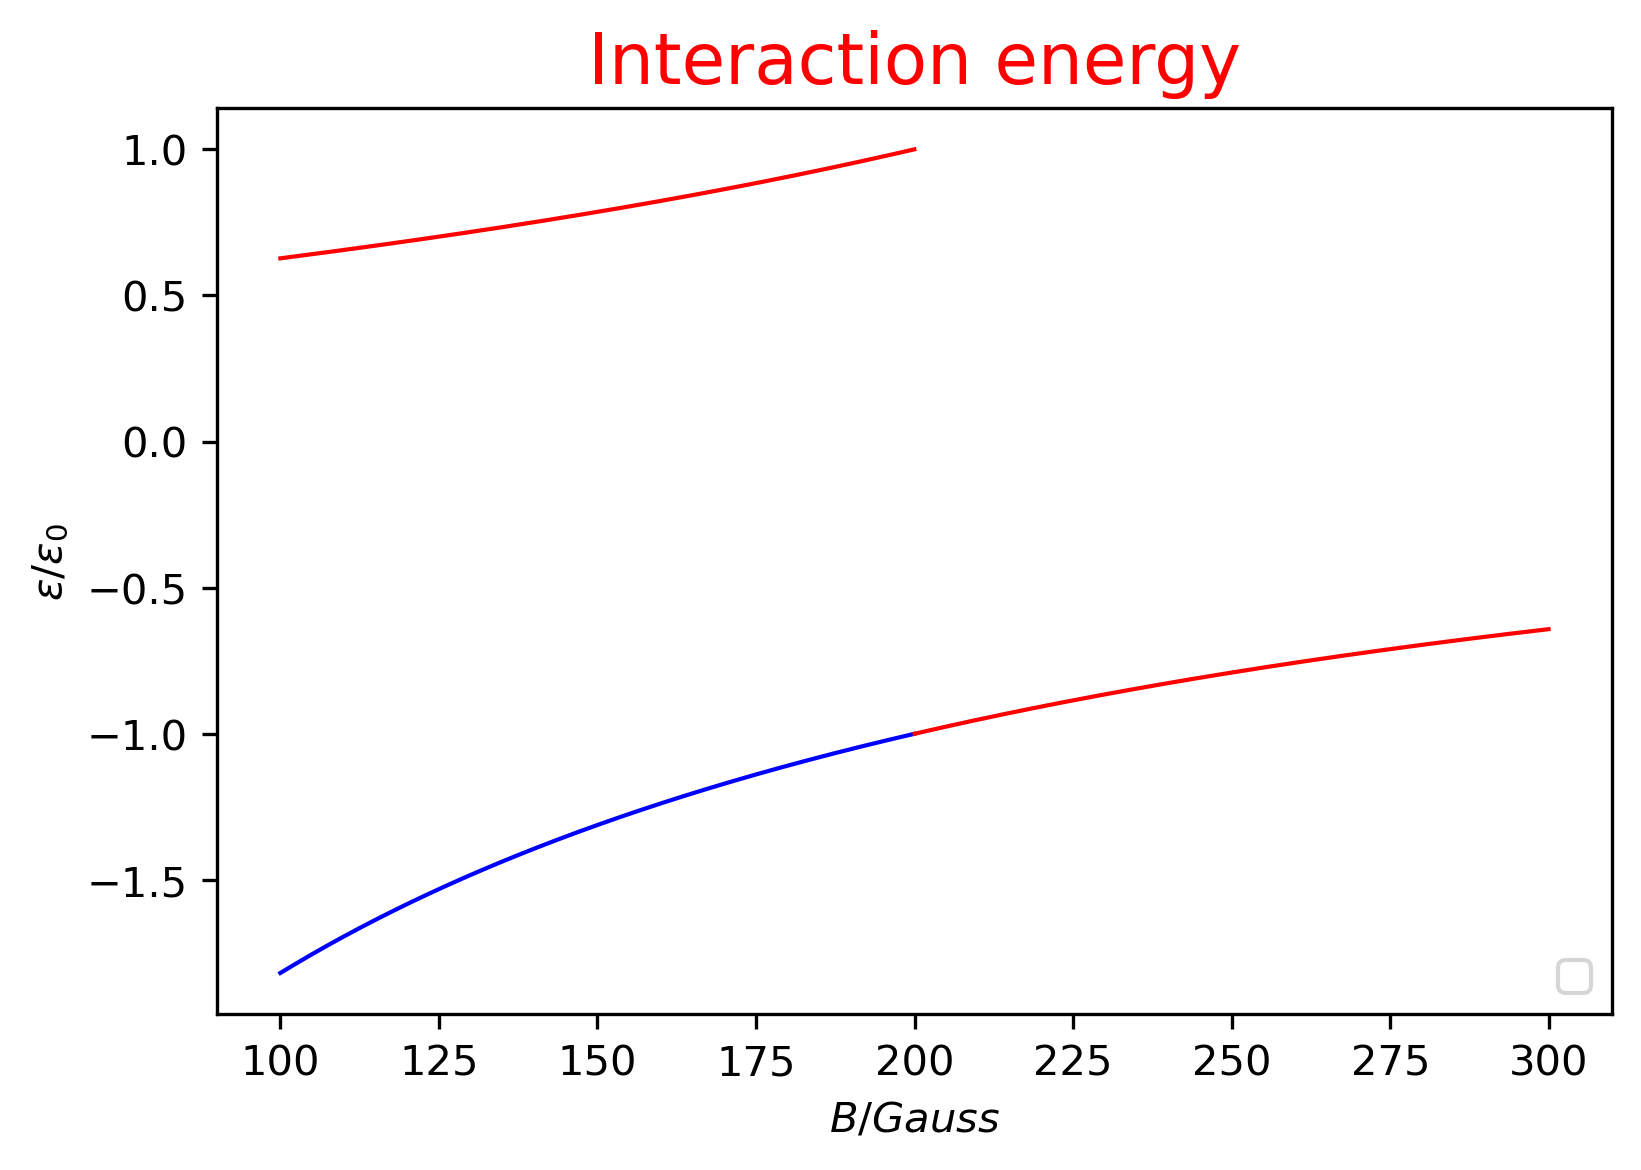

In [44]:
# -*- coding: utf-8 -*-

import numpy as np
import math
import matplotlib.pyplot as plt

#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04
r0=84.8

#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2
#散射长度公式
#asc=(-as0+5.57e-6*math.sqrt(m*B)*((as0**2-as1**2)-r0*as0))/((as0-r0)*5.57e-6*math.sqrt(m*B)-1)
#alpha=6.96482e-10/math.sqrt(m*T)/asc
#计算单元 ((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))

x1=np.arange(100,200,0.05)
x2=np.arange(200,300,0.05)

Nobound1=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*((as0**2-as1**2)-r0*as0))/((as0-r0)*5.57e-6*math.sqrt(m*B)-1)
#还是先看看asc符合不    temp=asc
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=-0.376*alpha+(1+2/3*alpha**2)*math.erfc(alpha)*math.exp(alpha**2)
    Nobound1.append(temp)

Nobound2=[]
for B in x2:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*((as0**2-as1**2)-r0*as0))/((as0-r0)*5.57e-6*math.sqrt(m*B)-1)
#还是先看看asc符合不    temp=asc
    alpha=-13.1616/math.sqrt(m*T)/asc
    temp=0.376*alpha-(1+2/3*alpha**2)*math.erfc(alpha)*math.exp(alpha**2)
    Nobound2.append(temp)


#=[ -4.9498*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))+(1+115.457*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*math.erfc(13.16*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB)))*math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)-math.exp(173.1856*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2)*(346.3712*((a-B0)/math.sqrt(m*T)/abg/(a-B0-DB))**2 + 2)    for a in x1] # y和x的函数关系（可以用math函数）

Bound1=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*((as0**2-as1**2)-r0*as0))/((as0-r0)*5.57e-6*math.sqrt(m*B)-1)
#还是先看看asc符合不    temp=asc
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=-0.376*alpha+(1+2/3*alpha**2)*math.erfc(alpha)*math.exp(alpha**2)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound1.append(temp)

plt.figure(num=2,dpi=300)
plt.plot(x1,Nobound1,color='red',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound1,color='b',linewidth=1.0,linestyle='-')
plt.plot(x2,Nobound2,color='red',linewidth=1.0,linestyle='-')
#plt.plot(x1,ts,color='red',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
#plt.ylim(-3,1.5)
#plot1=plt.plot(x,y1,'-r',label="log(T^2)-L")
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.legend(loc='lower right')
plt.show()


## 5. 把散射长度展开到二阶重复3
这部分与3中不同的是，散射长度展开到了二阶：
$$-\frac{tan\delta_k}{k}=\frac{1}{\frac{1}{a_s}-\frac{1}{2}r_{0}a_s^2k^2}$$
其中$r_0$是有效力程的范围
#### 下面先做第一步：含参积分的学习示例

In [1]:
import numpy as np
from scipy.integrate import quad

def integrand(t,n,x):
    return np.exp(-x*t)/t**n

def expint(n,x):
    return quad(integrand, 1, np.inf, args=(n,x))[0]

print(expint(1,1))

0.21938393439551238


#### 然后尝试写一下计算相互作用能量的含参积分

In [ ]:
import numpy as np
from scipy.integrate import quad

m=1
T=1
r0=1

def integrand(x,B):
    asc = #这里丢进去对应情况的asc就行
    return (0.6366-73.52*x**2/m/T)*exp(-173.23*x**2/m/T)*(asc+1.5*r0*asc**2*x**2)/(1+(asc*x+0.5*r0*asc**2*x**3)**2)

def eint(B):
    return quad(integrand, 0, np.inf, args=(B))[0]

print(eint(1,1))

#### 用数值积分重复一下3中的结果——即展开到0阶

C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
No handles with labels found to put in legend.


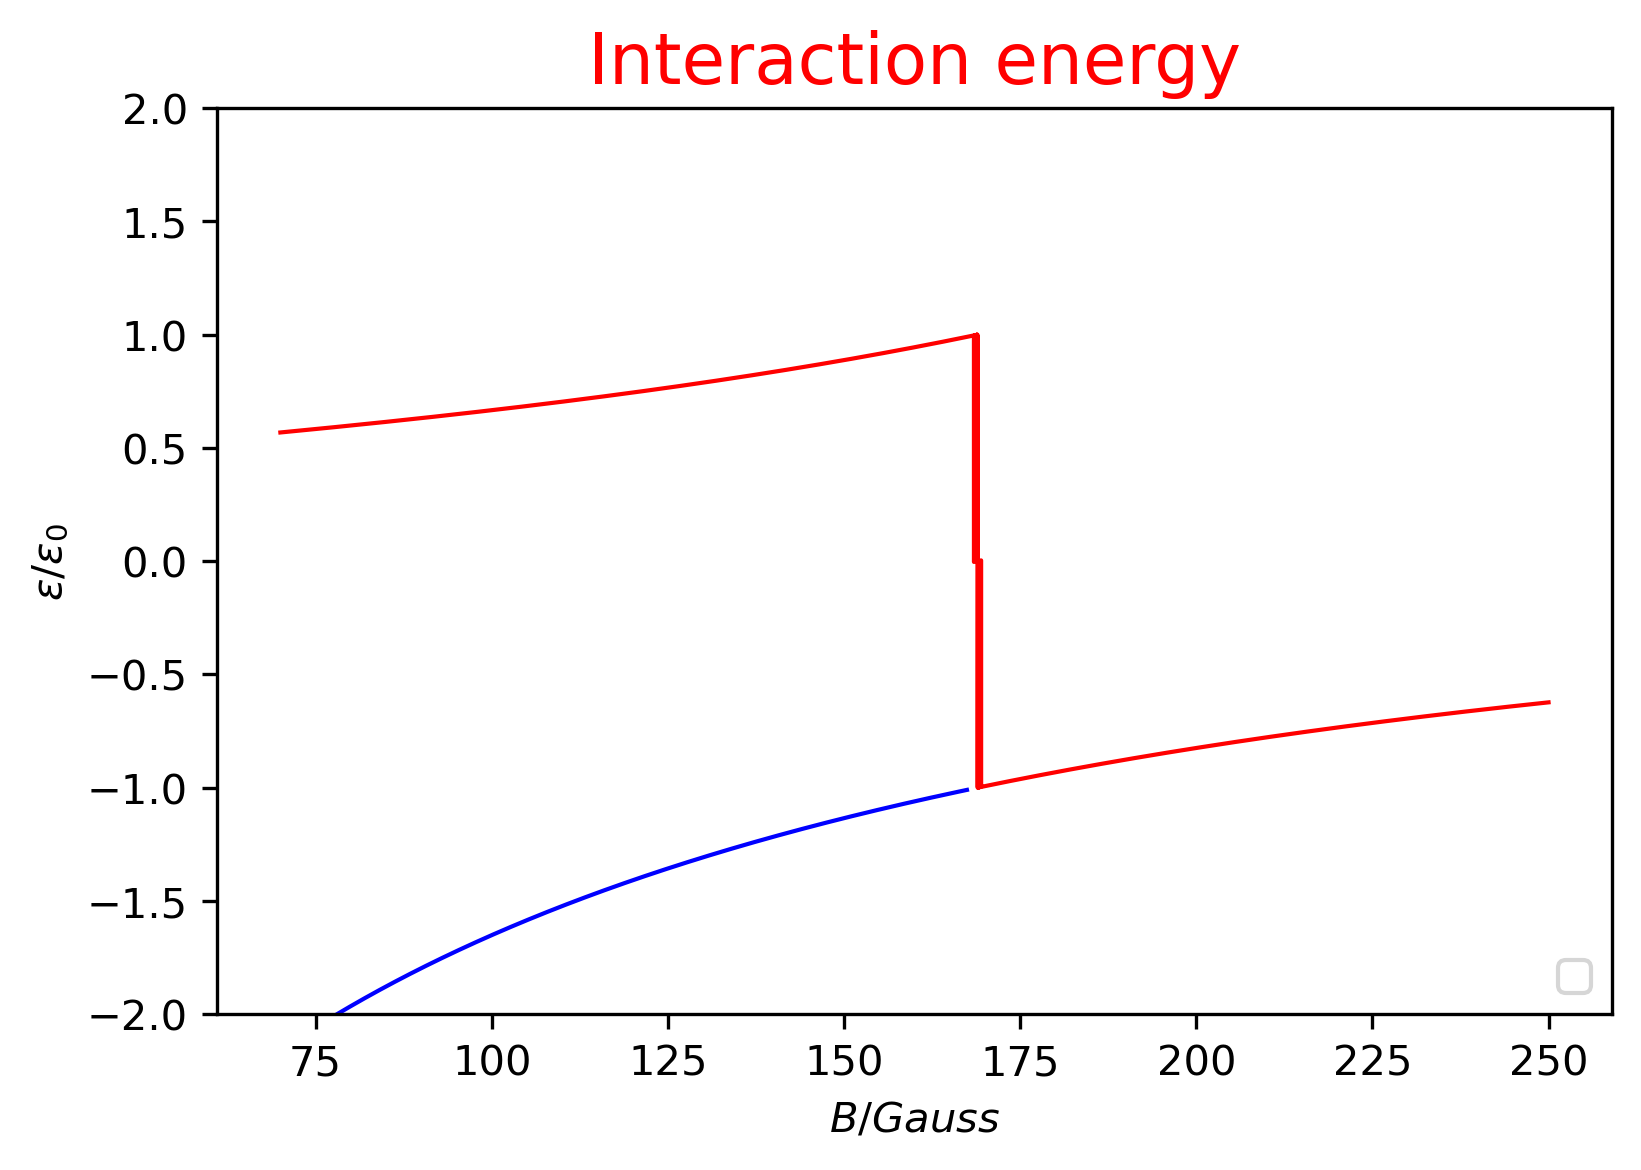

In [19]:
## 这个用来跑零阶

# -*- coding: utf-8 -*-

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad

#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04

#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2

#散射长度公式
#asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)

#数值计算相互作用能量
def integrand(x,B):
    asc = (-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    return (0.6366-73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*(asc)/(1+(asc*x)**2) #考虑零阶
def eint(B):
    return quad(integrand, 0, np.inf, args=(B))[0]

x1=np.arange(70,167.5,0.05)
x2=np.arange(70,250,0.001)


Nobound=[]
for B in x2:
    temp=eint(B)
    Nobound.append(temp)


Bound=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=eint(B)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound.append(temp)

plt.figure(num=2,dpi=300)
plt.plot(x2,Nobound,color='red',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound,color='b',linewidth=1.0,linestyle='-')
#plt.plot(x1,ts,color='red',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-2,2)
#plot1=plt.plot(x,y1,'-r',label="log(T^2)-L")
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.legend(loc='lower right')
plt.show()

#### 下面是展开到2阶，和展开到0阶的唯一区别在第27行代码：被积函数的形式
原因是此时满足：
$$-kcot(\delta_0(k))=\frac{1}{a_s}-\frac{1}{2}r_{0}a_s^2k^2 $$
所以$\frac{d\delta_k}{dk}$变了，这是唯一的区别

### 易为老师后来给了个综述，给出了展开二阶的显示，在这基础上改吧

C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:24: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
No handles with labels found to put in legend.


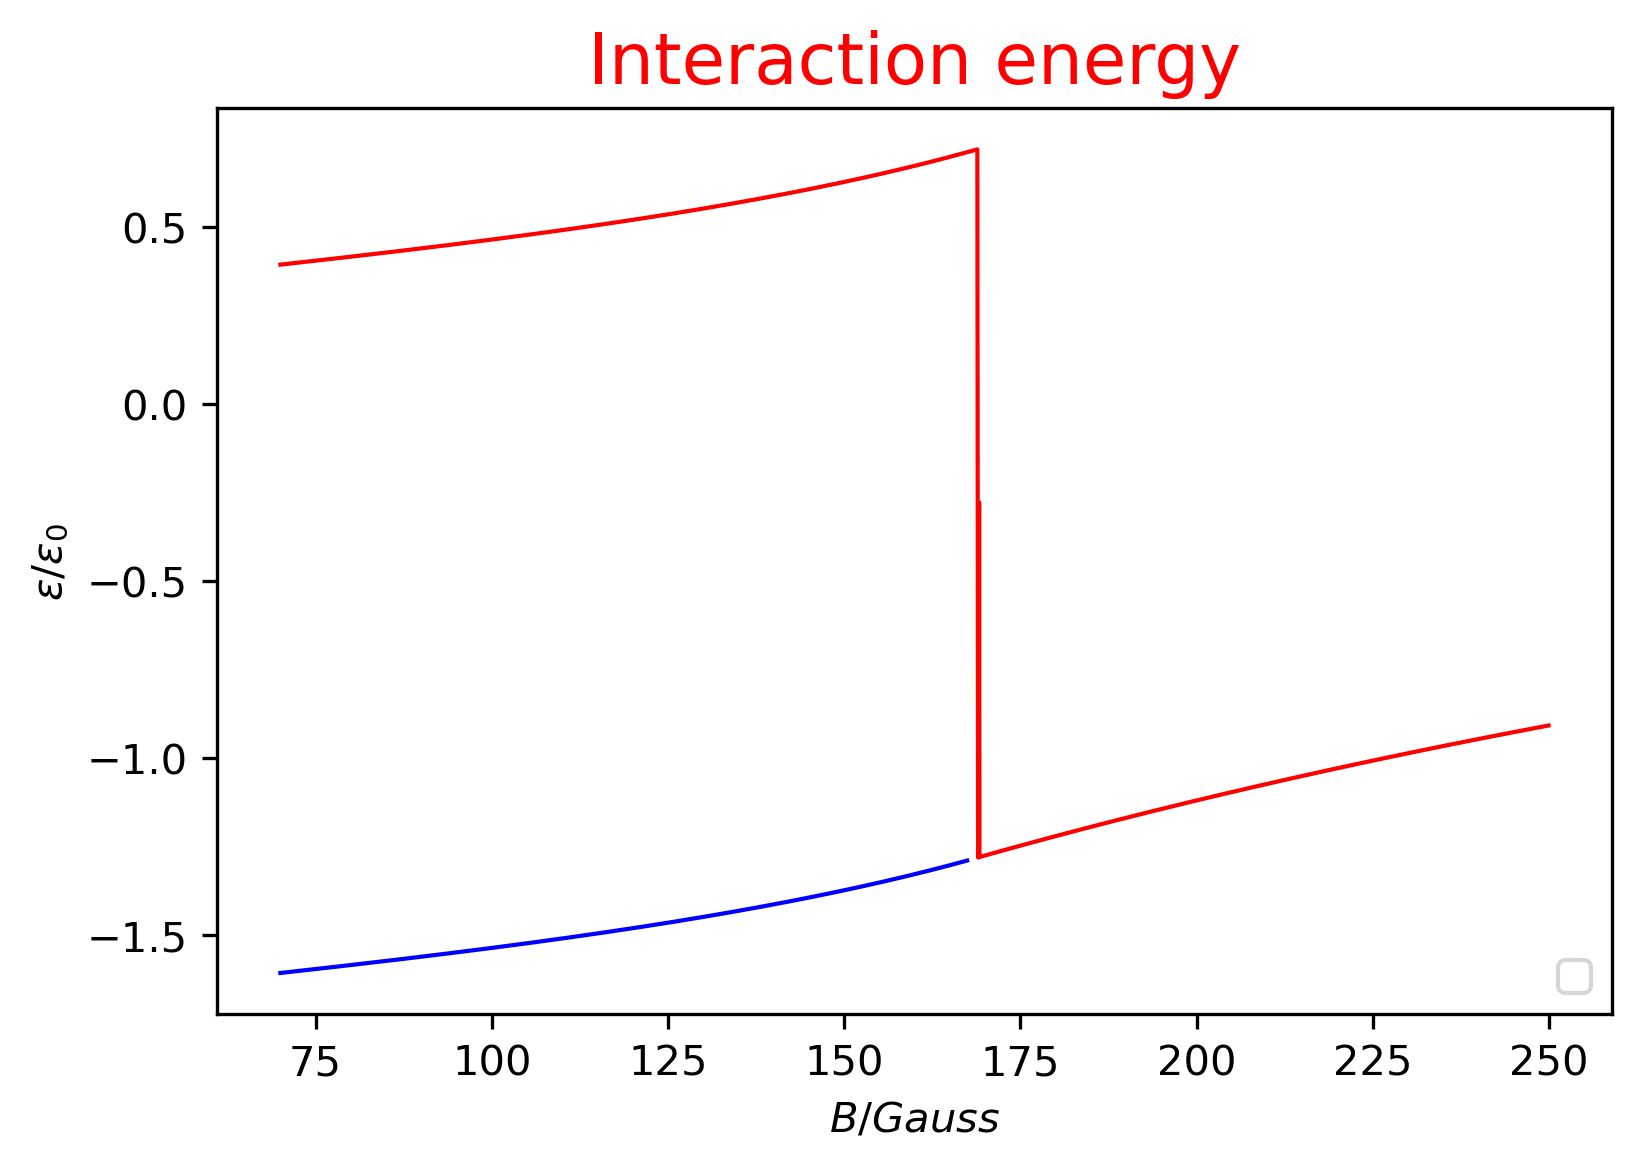

In [4]:
# -*- coding: utf-8 -*-

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative

#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04


#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2

#定义计算函数
def integrand(x,r0,asc,B):
    return (0.6366-73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*(1/asc+r0*x**2/2)/((1/asc-r0*x**2/2)**2+x**2)
def eint(r0,asc,B):
    return quad(integrand, 0, np.inf, args=(r0,asc,B))[0]

x1=np.arange(70,167.5,0.05)
x2=np.arange(70,250,0.05)

Nobound1=[]
for B in x2:
    q=5.57e-6*math.sqrt(m*B)
    asc=(-as0+q*(as0**2-as1**2))/(as0*q-1)
    r0=-as1**2/q/(as0-q*(as0**2-as1**2))**2
    temp=eint(r0,asc,B)
    Nobound1.append(temp)

Bound1=[]
for B in x1:
    q=5.57e-6*math.sqrt(m*B)
    asc=(-as0+q*(as0**2-as1**2))/(as0*q-1)
    r0=-as1**2/q/(as0-q*(as0**2-as1**2))**2
    temp=eint(r0,asc,B)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound1.append(temp)

plt.figure(num=2,dpi=300)
plt.plot(x2,Nobound1,color='red',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound1,color='b',linewidth=1.0,linestyle='-')
#plt.plot(x1,ts,color='red',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
#plt.ylim(-3,1.5)
#plot1=plt.plot(x,y1,'-r',label="log(T^2)-L")
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.legend(loc='lower right')
plt.show()

## 6. 把散射相位写成显式重复3(此时取一个上界)
此时由公式：
$$\frac{\tan\theta_k}{k}=\frac{-a_{s0}+(a_{s0}^2-a_{s1}^2)\sqrt{\frac{m\delta}{\hbar^2}-k^2}}{1-a_{s0}\sqrt{\frac{m\delta}{\hbar^2}-k^2}}$$
其中$\delta=\mu_B(\delta g)B=2\pi\hbar\times122*B$ 。其中B的单位是Gauss，$\delta$是国际单位制

#### 先尝试一下求导

In [1]:
from scipy.misc import derivative
import numpy as np

def bede(x,B):
    return np.arctan((-as0+(as0**2-as1**2)*np.sqrt(3.38e-11*m*B-x**2))/(1-as0*np.sqrt(3.38e-11*m*B-x**2))*x)
def de(x,B):
    return derivative(bede, x, dx=1e-10, args=(B))
def integrand(x,B):
    return (-0.6366+73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*de(x,B)
def eint(B):
    return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]

4.999999999921734

#### 再集合成整个代码
## 注意这里有个问题，这里的积分只积分了closed channel是bound state的时候（根号里>0），后面有可能两个channel都是scatter state，那时候需要重新考虑（|c>前的系数搞成scatter state的）

C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:34: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:34: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and cal

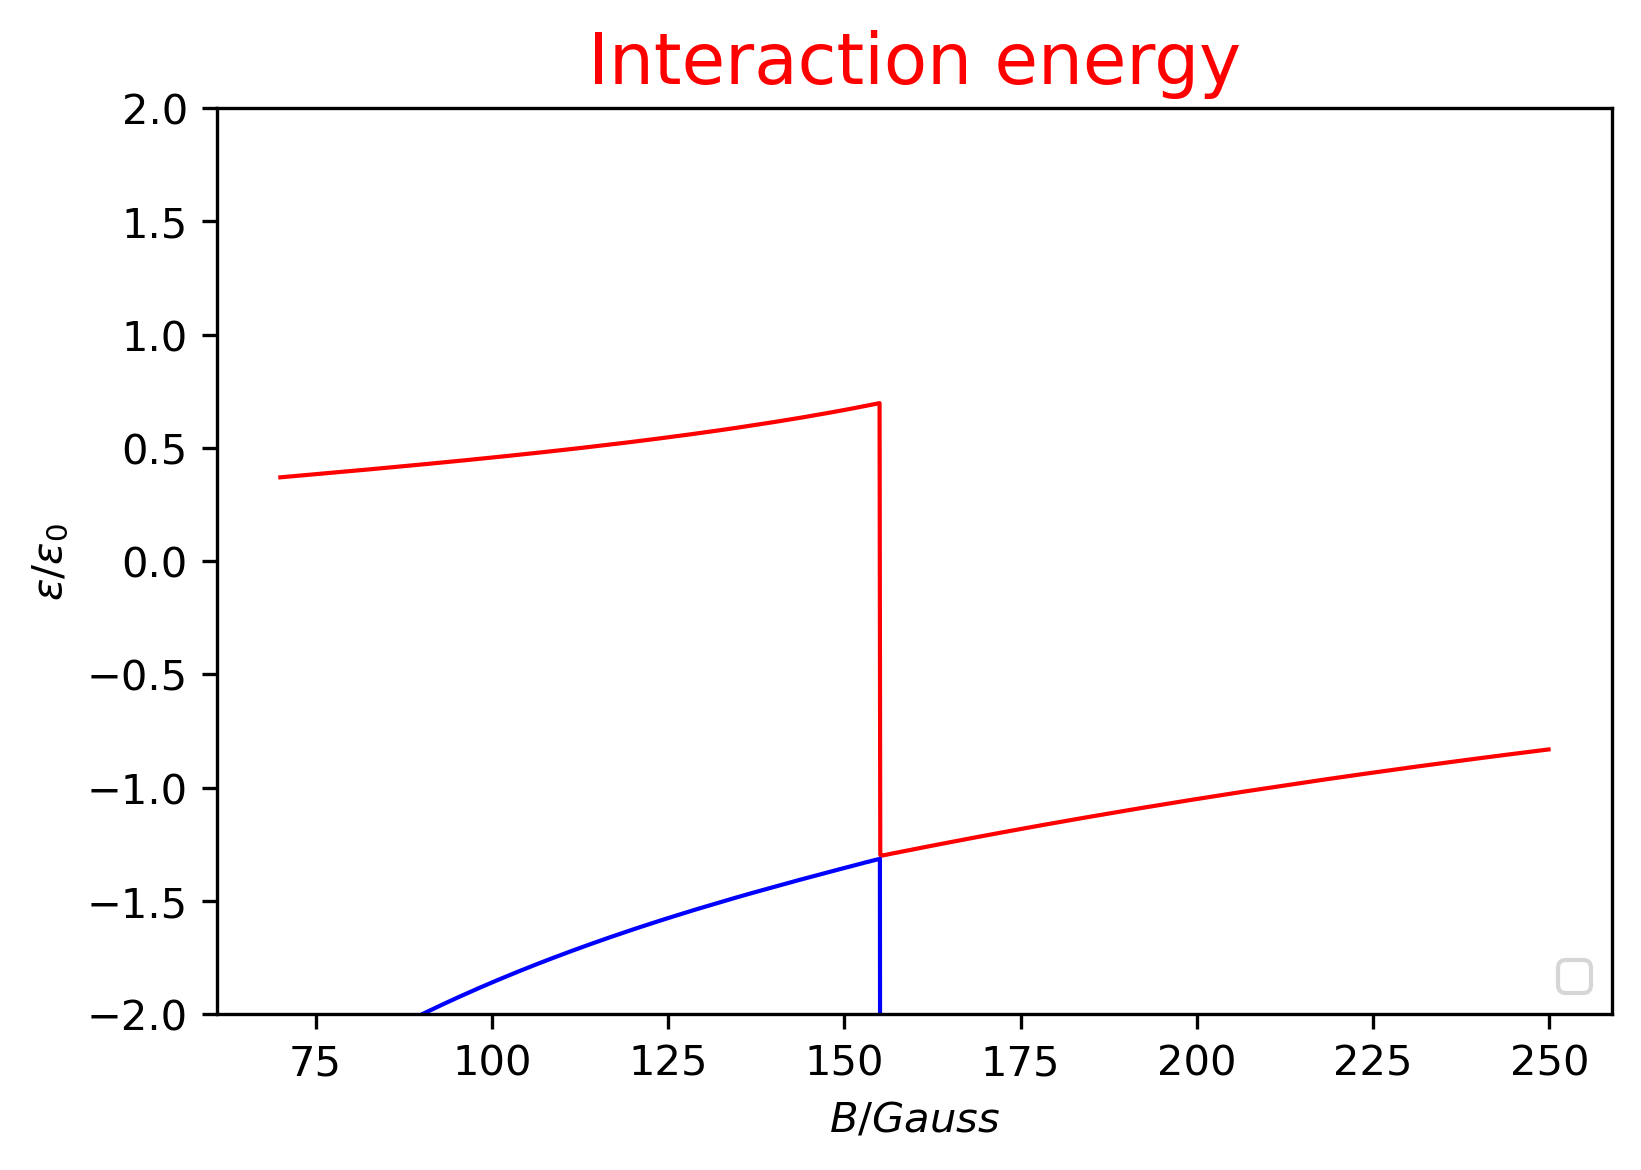

In [12]:
# -*- coding: utf-8 -*-

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative

#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04
r0=84.8


#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2

#散射长度公式
#asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)


#数值计算相互作用能量
def bede(t,B):
    return np.arctan((-as0+(as0**2-as1**2)*np.sqrt(3.38e-11*m*B-t**2))/(1-as0*np.sqrt(3.38e-11*m*B-t**2))*t)
def de(x,B):
    return derivative(bede, x, dx=1e-15, args=(B,), order=3)
def integrand(x,B):
    return (-0.6366+73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*de(x,B)
def eint(B):
    return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]


#区间的设置
x1=np.arange(70,167.5,0.05)
x2=np.arange(70,250,0.1)


Nobound=[]
for B in x2:
    temp=eint(B)
    Nobound.append(temp)
Bound=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=eint(B)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound.append(temp)

    
#下面是画图代码
plt.figure(num=2,dpi=300)
plt.plot(x2,Nobound,color='red',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound,color='b',linewidth=1.0,linestyle='-')
#plt.plot(x1,ts,color='red',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-2,2)
#plot1=plt.plot(x,y1,'-r',label="log(T^2)-L")
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.legend(loc='lower right')
plt.show()

#### 降维到3的情况看看对不对

C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
No handles with labels found to put in legend.


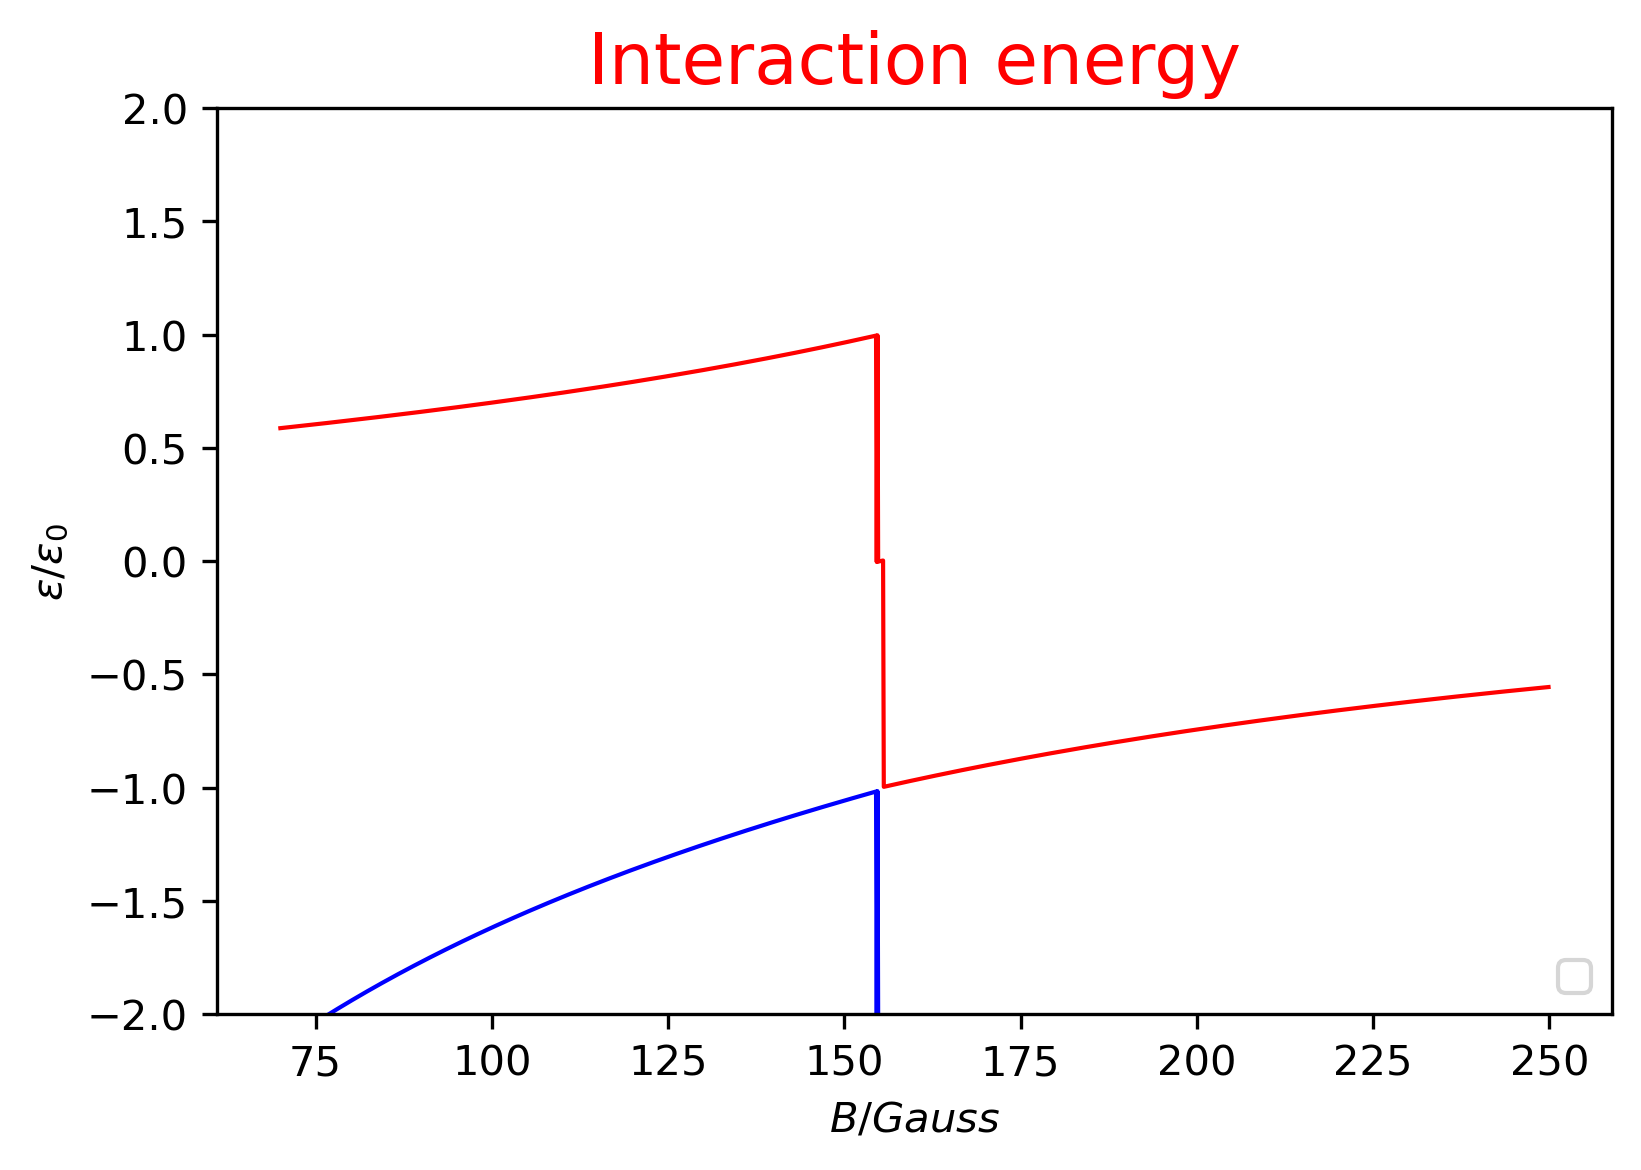

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative

#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04
r0=84.8


#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2

#散射长度公式
#asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)


#数值计算相互作用能量
def bede(t,B):
    return np.arctan((-as0+(as0**2-as1**2)*np.sqrt(3.38e-11*m*B))/(1-as0*np.sqrt(3.38e-11*m*B))*t)
def de(x,B):
    return derivative(bede, x, dx=1e-15, args=(B,), order=3)
def integrand(x,B):
    return (-0.6366+73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*de(x,B)
def eint(B):
    return quad(integrand, 0, np.inf, args=(B))[0]


#区间的设置
x1=np.arange(70,167.5,0.1)
x2=np.arange(70,250,0.1)


Nobound=[]
for B in x2:
    temp=eint(B)
    Nobound.append(temp)
Bound=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=eint(B)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound.append(temp)

    
#下面是画图代码
plt.figure(num=2,dpi=300)
plt.plot(x2,Nobound,color='red',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound,color='b',linewidth=1.0,linestyle='-')
#plt.plot(x1,ts,color='red',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-2,2)
#plot1=plt.plot(x,y1,'-r',label="log(T^2)-L")
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.legend(loc='lower right')
plt.show()

## 7. 把3，5，6结合起来画个图、即把Huang-Yang赝势直接高温展开、二阶、显示画在同一个图里

In [21]:
#零阶
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.misc import derivative


#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04

#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2

#散射长度公式
#asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)


#数值计算相互作用能量
def integrand(x,B):
    asc = (-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    return (0.6366-73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*(asc)/(1+(asc*x)**2) #考虑零阶
def eint(B):
    return quad(integrand, 0, np.inf, args=(B))[0]

x1=np.arange(70,167.5,0.1)
x2=np.arange(70,250,0.1)
x3=np.arange(70,154,0.1)


Nobound0=[]
for B in x2:
    temp=eint(B)
    Nobound0.append(temp)


Bound0=[]
for B in x1:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=eint(B)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound0.append(temp)

C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.


In [22]:
#二阶
#定义计算函数
def integrand(x,r0,asc,B):
    return (0.6366-73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*(1/asc+r0*x**2/2)/((1/asc-r0*x**2/2)**2+x**2)
def eint(r0,asc,B):
    return quad(integrand, 0, np.inf, args=(r0,asc,B))[0]

Nobound1=[]
for B in x2:
    q=5.57e-6*math.sqrt(m*B)
    asc=(-as0+q*(as0**2-as1**2))/(as0*q-1)
    r0=-as1**2/q/(as0-q*(as0**2-as1**2))**2
    temp=eint(r0,asc,B)
    Nobound1.append(temp)

Bound1=[]
for B in x1:
    q=5.57e-6*math.sqrt(m*B)
    asc=(-as0+q*(as0**2-as1**2))/(as0*q-1)
    alpha=13.1616/math.sqrt(m*T)/asc
    r0=-as1**2/q/(as0-q*(as0**2-as1**2))**2
    temp=eint(r0,asc,B)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound1.append(temp)

In [23]:
#精确
#数值计算相互作用能量
def bede(t,B):
    return np.arctan((-as0+(as0**2-as1**2)*np.sqrt(3.38e-11*m*B-t**2))/(1-as0*np.sqrt(3.38e-11*m*B-t**2))*t)
def de(x,B):
    return derivative(bede, x, dx=1e-15, args=(B,), order=3)
def integrand(x,B):
    return (-0.6366+73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*de(x,B)
def eint(B):
    return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]

Nobound2=[]
for B in x2:
    temp=eint(B)
    Nobound2.append(temp)
Bound2=[]
for B in x3:
    asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    alpha=13.1616/math.sqrt(m*T)/asc
    temp=eint(B)-math.exp(alpha**2)*(4/3*alpha**2+2)
    Bound2.append(temp)

C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can

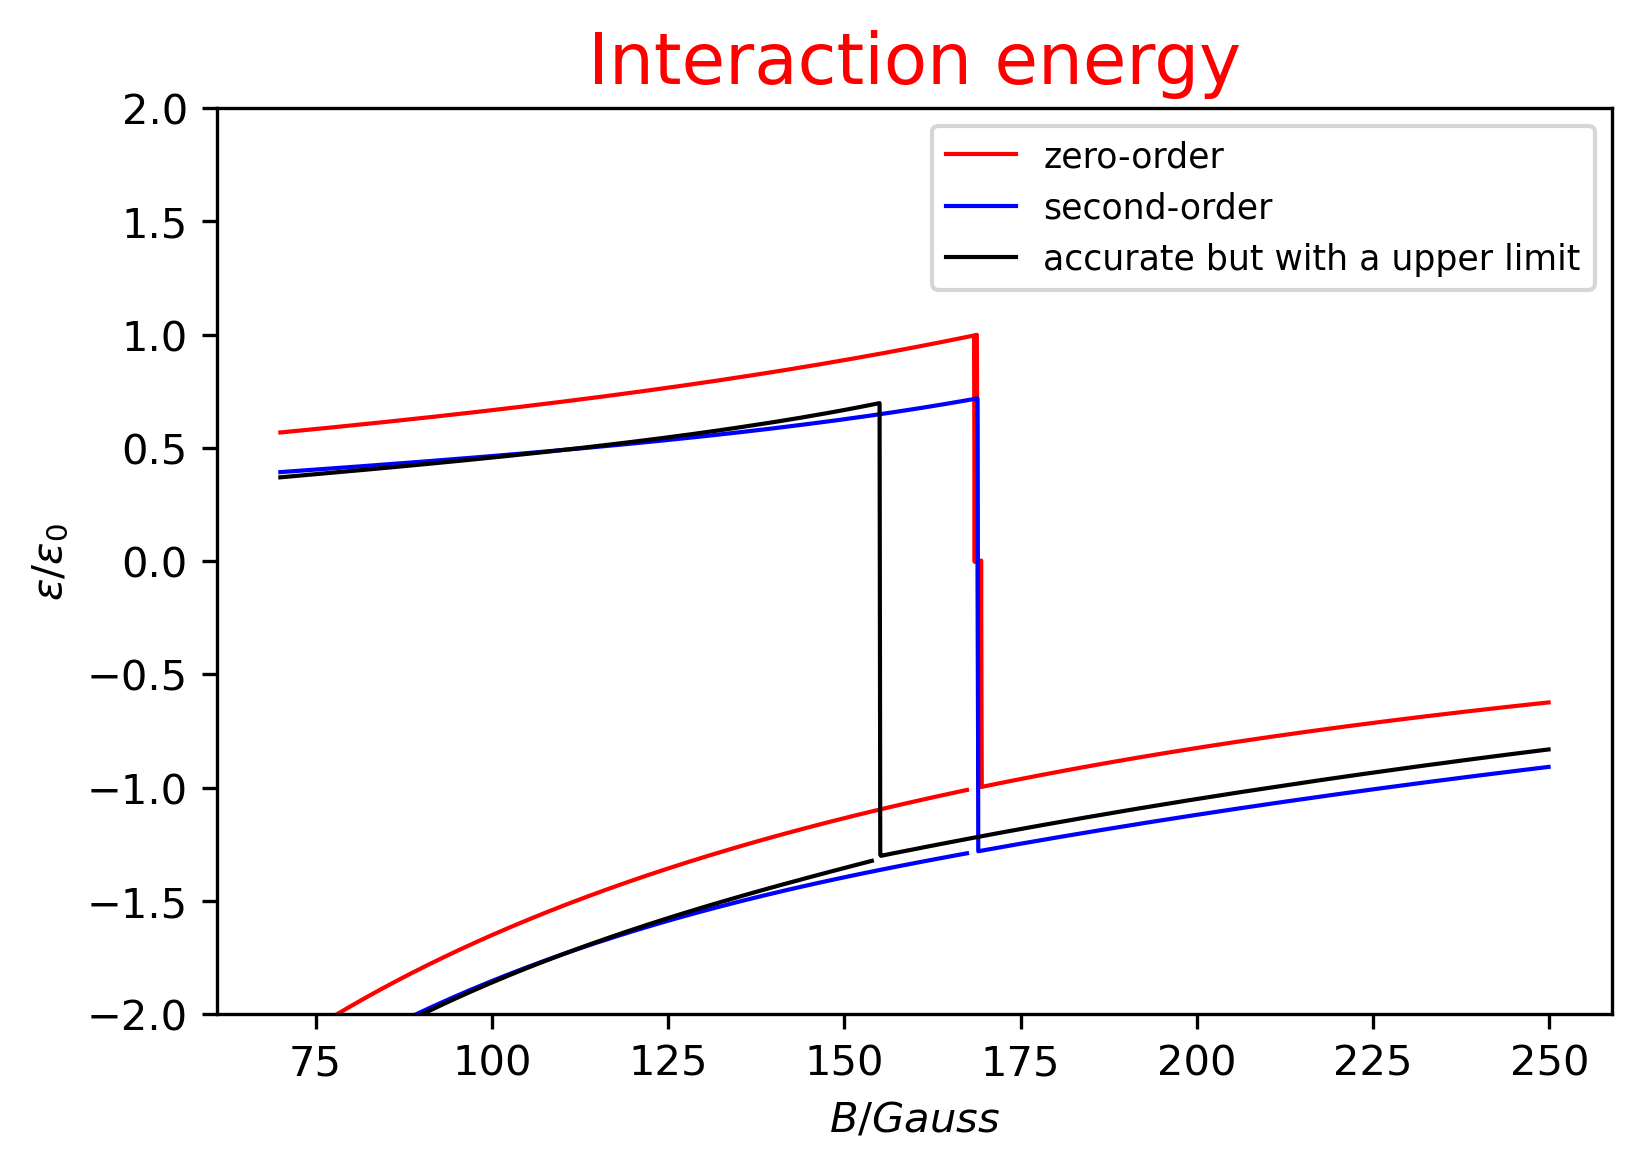

In [51]:
#下面是画图代码
plt.figure(num=2,dpi=300)
l0,=plt.plot(x2,Nobound0,color='r',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound0,color='r',linewidth=1.0,linestyle='-')
l1,=plt.plot(x2,Nobound1,color='b',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound1,color='b',linewidth=1.0,linestyle='-')
l2,=plt.plot(x2,Nobound2,color='black',linewidth=1.0,linestyle='-')
plt.plot(x3,Bound2,color='black',linewidth=1.0,linestyle='-')

ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-2,2)
plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.show()